In [1]:
%matplotlib tk

import numpy as np
import matplotlib.pyplot as plt

from halton import *
from scipy.spatial import cKDTree
import scipy.sparse as sp

In [2]:
n = 500
n_boundary = 50

def boundary_param(t):
    return (np.cos(2*np.pi*t), np.sin(2*np.pi*t))

inner_nodes = halton_sequence(1,n,2).T
#circularize
inner_nodes = np.array([(np.sqrt(x)*np.cos(2*np.pi*y), np.sqrt(x)*np.sin(2*np.pi*y)) for (x,y) in inner_nodes])

#boundary_nodes = np.array([ boundary_param(t) for t in halton_sequence(0,n_boundary-1,1).ravel()])
boundary_nodes = np.array([ boundary_param(t) for t in np.linspace(0,1,n_boundary, endpoint=False).ravel()])

nodes = np.concatenate((inner_nodes, boundary_nodes), axis=0)

In [3]:
plt.figure(figsize=(8,8))
plt.plot(nodes[:,0], nodes[:,1], 'k.')

Quad1 nodes: 138
Quad2 nodes: 139
Quad3 nodes: 136
Quad4 nodes: 137


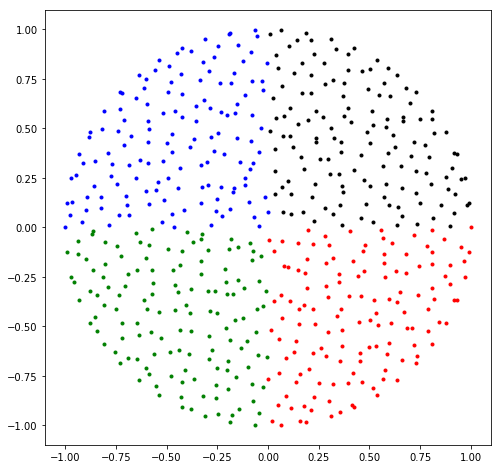

In [4]:
quad1_inner = np.array([node for node in inner_nodes if node[0]>=0 and node[1]>0])
quad2_inner = np.array([node for node in inner_nodes if node[0]<0 and node[1]>=0])
quad3_inner = np.array([node for node in inner_nodes if node[0]<=0 and node[1]<0])
quad4_inner = np.array([node for node in inner_nodes if node[0]>0 and node[1]<=0])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=0 and node[1]>0])
quad2_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[1]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if node[0]<=0 and node[1]<0])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]>0 and node[1]<=0])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

Quad1 nodes: 141
Quad2 nodes: 134
Quad3 nodes: 129
Quad4 nodes: 146


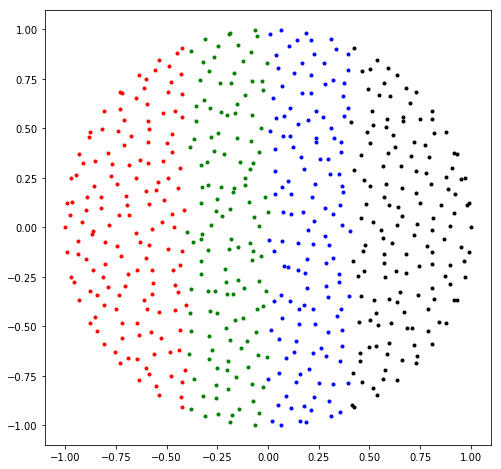

In [5]:
cutoff = 0.4039727532995172

quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
quad2_inner = np.array([node for node in inner_nodes if node[0]<cutoff and node[0]>=0])
quad3_inner = np.array([node for node in inner_nodes if node[0]<0 and node[0]>=-cutoff])
quad4_inner = np.array([node for node in inner_nodes if node[0]<-cutoff])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
quad2_boundary = np.array([node for node in boundary_nodes if node[0]<cutoff and node[0]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[0]>=-cutoff])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]<-cutoff])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

Quad1 nodes: 141
Quad2 nodes: 132
Quad3 nodes: 131
Quad4 nodes: 146


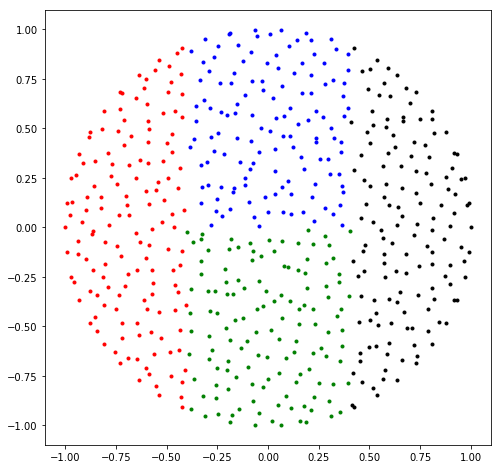

In [6]:
cutoff = 0.4039727532995172

quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
quad2_inner = np.array([node for node in inner_nodes if cutoff>node[0]>-cutoff and node[1]>=0])
quad3_inner = np.array([node for node in inner_nodes if cutoff>node[0]>-cutoff and node[1]<0])
quad4_inner = np.array([node for node in inner_nodes if node[0]<=-cutoff])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
quad2_boundary = np.array([node for node in boundary_nodes if cutoff>node[0]>-cutoff and node[1]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if cutoff>node[0]>-cutoff and node[1]<0])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]<=-cutoff])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

Quad1 nodes: 123
Quad2 nodes: 145
Quad3 nodes: 142
Quad4 nodes: 140


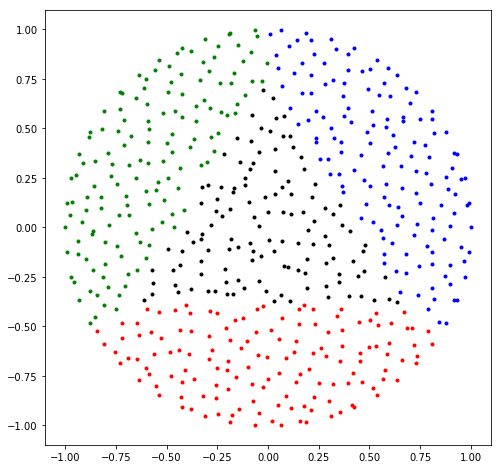

In [7]:
r = np.sqrt(np.pi/np.sqrt(27))

quad1_inner = np.array([node for node in inner_nodes 
        if node[1]>=-.5*r
        and (node[1]-r)*(np.sqrt(3/4)*r)<=(-1.5*r)*(node[0])
        and (node[1]-r)*(-np.sqrt(3/4)*r)>=(-1.5*r)*(node[0])
    ])

quad2_inner = np.array([node for node in inner_nodes 
        if (node[1]-r)*(np.sqrt(3/4)*r)>(-1.5*r)*(node[0])
        and node[0]>=0
        and node[1]>-1/np.sqrt(3)*node[0]
    ])

quad3_inner = np.array([node for node in inner_nodes 
        if (node[1]-r)*(-np.sqrt(3/4)*r)<(-1.5*r)*(node[0])
        and node[0]<0
        and node[1]>1/np.sqrt(3)*node[0]
    ])

quad4_inner = np.array([node for node in inner_nodes 
        if node[1]<-.5*r
        and node[1]<1/np.sqrt(3)*node[0]
        and node[1]<-1/np.sqrt(3)*node[0]
    ])


quad1_boundary=[]
quad2_boundary = np.array([node for node in boundary_nodes 
        if (node[1]-r)*(np.sqrt(3/4)*r)>(-1.5*r)*(node[0])
        and node[0]>=0
        and node[1]>-1/np.sqrt(3)*node[0]
    ])

quad3_boundary = np.array([node for node in boundary_nodes 
        if (node[1]-r)*(-np.sqrt(3/4)*r)<(-1.5*r)*(node[0])
        and node[0]<0
        and node[1]>1/np.sqrt(3)*node[0]
    ])

quad4_boundary = np.array([node for node in boundary_nodes 
        if node[1]<-.5*r
        and node[1]<1/np.sqrt(3)*node[0]
        and node[1]<-1/np.sqrt(3)*node[0]
    ])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.') 
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

#plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

In [8]:
def decomp0(inner_nodes, boundary_nodes, stencil_size):
    k = stencil_size
    cutoff = 0.4039727532995172

    quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
    quad2_inner = np.array([node for node in inner_nodes if node[0]<cutoff and node[0]>=0])
    quad3_inner = np.array([node for node in inner_nodes if node[0]<0 and node[0]>=-cutoff])
    quad4_inner = np.array([node for node in inner_nodes if node[0]<-cutoff])

    quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
    quad2_boundary = np.array([node for node in boundary_nodes if node[0]<cutoff and node[0]>=0])
    quad3_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[0]>=-cutoff])
    quad4_boundary = np.array([node for node in boundary_nodes if node[0]<-cutoff])

    quad1_neighbors = np.zeros((len(quad1_inner), k))
    quad_local = np.concatenate((quad1_inner, quad2_inner, quad1_boundary, quad2_boundary), axis=0)
    tree = cKDTree(nodes)
    indices = tree.query(nodes[k],l)[1]

In [9]:
test = [node for node in quad1_inner if node in quad4_inner]

# 2proc testing

In [10]:
n = 100
n_boundary = 25

def boundary_param(t):
    return (np.cos(2*np.pi*t), np.sin(2*np.pi*t))

inner_nodes = halton_sequence(1,n,2).T
#circularize
inner_nodes = np.array([(np.sqrt(x)*np.cos(2*np.pi*y), np.sqrt(x)*np.sin(2*np.pi*y)) for (x,y) in inner_nodes])

#boundary_nodes = np.array([ boundary_param(t) for t in halton_sequence(0,n_boundary-1,1).ravel()])
boundary_nodes = np.array([ boundary_param(t) for t in np.linspace(0,1,n_boundary, endpoint=False).ravel()])

nodes = np.concatenate((inner_nodes, boundary_nodes), axis=0)

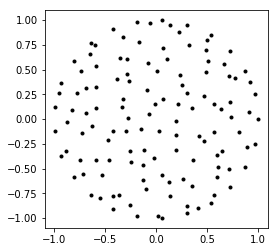

In [11]:
plt.figure(figsize=(4,4))
plt.plot(nodes[:,0], nodes[:,1], 'k.')

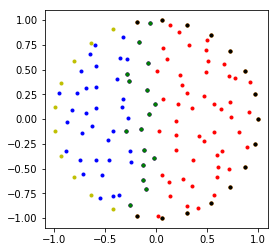

In [12]:
k = 10

nodes1 = np.array([node for node in inner_nodes if node[0]>=0])
nodes2 = np.array([node for node in inner_nodes if node[0]<0])
#nodes1_boundary = np.array([node for node in boundary_nodes if node[0]>=0])
#nodes2_boundary = np.array([node for node in boundary_nodes if node[0]<0])

neighbors = np.zeros((len(nodes1), k), dtype=np.int32)

nodes = np.concatenate((nodes1, nodes2, boundary_nodes), axis=0)
tree = cKDTree(nodes)
#indices = tree.query(nodes[k],l)[1]
for r in range(len(nodes1)):
    neighbors[r,:] = tree.query(nodes[r],k)[1]

n_to_g = []
b_to_g = []
local_start = 0
local_end = len(nodes1) - 1
boundary_start = len(nodes1)+len(nodes2)
for i in neighbors.ravel():
    if i<local_start or local_end<i<boundary_start:
        if i not in n_to_g:
            n_to_g += [i]
    elif boundary_start<= i:
        if i not in b_to_g:
            b_to_g += [i]
        
node1_n = np.array([nodes[i] for i in n_to_g])
node1_b = np.array([nodes[i] for i in b_to_g])

nodes1 = np.concatenate((nodes1, node1_n, node1_b), axis=0)

plt.figure(figsize=(4,4))
plt.plot(nodes1[:,0], nodes1[:,1], 'r.')
plt.plot(nodes2[:,0], nodes2[:,1], 'b.')
plt.plot(boundary_nodes[:,0], boundary_nodes[:,1], 'y.')

plt.plot(node1_n[:,0], node1_n[:,1], 'g.')
plt.plot(node1_b[:,0], node1_b[:,1], 'k.')

In [13]:
neighbors[:10]

array([[  0,  21, 103,  27,  49,  13,  46, 102,  18,  31],
       [  1,  42,  28,   6,  22,  36, 119,  19, 120,  82],
       [  2,  15,  29,  71,  32,   9,   5,  37,  84,  43],
       [  3,  39,  33,  14,  20,  48,  24,  35,  60,  17],
       [  4,  26,  40,  45,  12,  49, 101,  21,   8,  31],
       [  5,  41,  32,  35,  23,   8,  17,  13,  29,   2],
       [  6,  19,  42,   1,  36,  24,  28,  33,  47,  38],
       [  7,  30,  44,  16,  48,  11,  34,  25,  38, 123],
       [  8,  45,  17,  41,  26,   5,  13,   4,  35,  21],
       [  9,  37,  46,  18, 105, 104,  27,  15,   2,  43]], dtype=int32)

In [14]:
len(nodes2) - len(n_to_g)

34

In [15]:
node1_n

array([[-0.09643839, -0.70605392],
       [-0.07752074,  0.56755223],
       [-0.1684094 ,  0.77746432],
       [-0.02298376, -0.39461595],
       [-0.14769477, -0.09714038],
       [-0.0698615 ,  0.05414675],
       [-0.11911759, -0.30852229],
       [-0.01284995,  0.15255287],
       [-0.29655132, -0.11670396],
       [-0.05629849,  0.96660772],
       [-0.25852094, -0.86352008],
       [-0.13231492, -0.61083366],
       [-0.0878152 ,  0.29332319],
       [-0.26453839,  0.38570642],
       [-0.28077073,  0.45850877],
       [-0.12467956, -0.45936642]])

In [16]:
5 > 2 < 1

False

In [17]:
test = {}
test[1] = 4
test[3] = 5

In [18]:
test[1]

4

In [19]:
test[2]

KeyError: 2

In [ ]:
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************
#*****************************************************************************

In [2]:
def halton(n):
    inner_nodes = halton_sequence(1,n,2).T
    inner_nodes = np.array([(np.sqrt(x)*np.cos(2*np.pi*y), 
                             np.sqrt(x)*np.sin(2*np.pi*y)) 
                            for (x,y) in inner_nodes])
    return inner_nodes

def vogel(n):
    theta_hat = np.pi*(3-np.sqrt(5))
    inner_nodes = np.array([ (np.sqrt(i/n)*np.cos(i*theta_hat), 
                              np.sqrt(i/n)*np.sin(i*theta_hat)) for i in range(1,n+1)])
    return inner_nodes


def boundary_param(t):
    return (np.cos(2*np.pi*t), np.sin(2*np.pi*t))

def order_to_sparse(nodes, tree, n, n_boundary, k):
    weights = [1]*n*k
    rows = []
    cols = []
    for r, node in enumerate(inner_nodes):
        nn = tree.query(node, k)[1]
        for c in nn[:k]:
            rows += [r]
            cols += [c]
    return sp.csr_matrix( (np.array(weights), (np.array(rows), np.array(cols))), shape=(n,n+n_boundary) )

In [74]:
n = 100
n_boundary = 20
k = 6


inner_nodes = halton(n)
boundary_nodes = np.array([ boundary_param(t) for t in np.linspace(0,1,n_boundary, endpoint=False).ravel()])

plt.figure(figsize=(8,8))
plt.plot(inner_nodes[:,0], inner_nodes[:,1],'k.')
plt.plot(boundary_nodes[:,0], boundary_nodes[:,1], 'y.')

In [75]:
nodes = np.concatenate((inner_nodes, boundary_nodes), axis=0)
old_tree = cKDTree(nodes)
A_old = order_to_sparse(nodes, old_tree, n, n_boundary, k)


In [76]:
cutoff = 0.4039727532995172

quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
quad2_inner = np.array([node for node in inner_nodes if node[0]<cutoff and node[0]>=0])
quad3_inner = np.array([node for node in inner_nodes if node[0]<0 and node[0]>=-cutoff])
quad4_inner = np.array([node for node in inner_nodes if node[0]<-cutoff])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
quad2_boundary = np.array([node for node in boundary_nodes if node[0]<cutoff and node[0]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[0]>=-cutoff])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]<-cutoff])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

Quad1 nodes: 33
Quad2 nodes: 27
Quad3 nodes: 29
Quad4 nodes: 31


In [77]:
old_nodes = nodes
inner_nodes = nodes = np.concatenate((quad1_inner, quad2_inner, quad3_inner, quad4_inner), axis=0)
nodes = np.concatenate((inner_nodes, boundary_nodes), axis=0)
tree = cKDTree(nodes)
print(len(quad1_inner))
print(len(quad2_inner))
print(len(quad3_inner))
print(len(quad4_inner))
quad_index_start = [0, len(quad1_inner)]
quad_index_start += [quad_index_start[-1]+len(quad2_inner)]
quad_index_start += [quad_index_start[-1]+len(quad3_inner)]
quad_index_start += [quad_index_start[-1]+len(quad4_inner)]
print(quad_index_start)

26
24
26
24
[0, 26, 50, 76, 100]


In [78]:
quad1_n2 = []
quad1_nx = []
for node in quad1_inner:
    nn = tree.query(node, k)[1]
    if any([quad_index_start[1]<=i<quad_index_start[2]  for i in nn]):
        quad1_n2.append(node)
    else:
        quad1_nx.append(node)
        
quad1_n2 = np.array(quad1_n2)
quad1_nx = np.array(quad1_nx)
        
quad2_n1 = []
quad2_n3 = []
quad2_nx = []
for node in quad2_inner:
    nn = tree.query(node, k)[1]
    if any([quad_index_start[0]<=i<quad_index_start[1] for i in nn]):
        quad2_n1.append(node)
    elif any([quad_index_start[2]<=i<quad_index_start[3] for i in nn]):
        quad2_n3.append(node)
    else:
        quad2_nx.append(node)
        
quad2_n1 = np.array(quad2_n1)
quad2_n3 = np.array(quad2_n3)
quad2_nx = np.array(quad2_nx)


quad3_n2 = []
quad3_n4 = []
quad3_nx = []
for node in quad3_inner:
    nn = tree.query(node, k)[1]
    if any([quad_index_start[1]<=i<quad_index_start[2] for i in nn]):
        quad3_n2.append(node)
    elif any([quad_index_start[3]<=i<quad_index_start[4] for i in nn]):
        quad3_n4.append(node)
    else:
        quad3_nx.append(node)
        
quad3_n2 = np.array(quad3_n2)
quad3_n4 = np.array(quad3_n4)
quad3_nx = np.array(quad3_nx)

quad4_n3 = []
quad4_nx = []
for node in quad4_inner:
    nn = tree.query(node, k)[1]
    if any([quad_index_start[2]<=i<quad_index_start[3] for i in nn]):
        quad4_n3.append(node)
    else:
        quad4_nx.append(node)
        
quad4_n3 = np.array(quad4_n3)
quad4_nx = np.array(quad4_nx)

plt.figure(figsize=(8,8))
plt.plot(boundary_nodes[:,0], boundary_nodes[:,1], 'y.')
plt.plot((cutoff, cutoff), (1,-1), 'k-')
plt.plot((-cutoff, -cutoff), (1,-1), 'k-')
plt.plot((0, 0), (1,-1), 'k-')

plt.plot(quad1_n2[:,0], quad1_n2[:,1], 'g.')
plt.plot(quad1_nx[:,0], quad1_nx[:,1], 'b.')

plt.plot(quad2_n1[:,0], quad2_n1[:,1], 'r.')
plt.plot(quad2_n3[:,0], quad2_n3[:,1], 'g.')
plt.plot(quad2_nx[:,0], quad2_nx[:,1], 'b.')

plt.plot(quad3_n2[:,0], quad3_n2[:,1], 'r.')
plt.plot(quad3_n4[:,0], quad3_n4[:,1], 'g.')
plt.plot(quad3_nx[:,0], quad3_nx[:,1], 'b.')

plt.plot(quad4_n3[:,0], quad4_n3[:,1], 'r.')
plt.plot(quad4_nx[:,0], quad4_nx[:,1], 'b.')



In [79]:
plt.figure(figsize=(8,8))
plt.spy(A_old, markersize=2.25)
for i in quad_index_start[1:]:
    plt.plot((0,n), (i,i), 'k-')
    plt.plot((i,i), (0,n+n_boundary), 'k-')

In [81]:
new_nodes = nodes1 = np.concatenate((
        quad1_nx, quad1_n2,
        quad2_n1, quad2_nx, quad2_n3,
        quad3_n2, quad3_nx, quad3_n4,
        quad4_n3, quad4_nx,
        boundary_nodes), axis=0)

new_tree = cKDTree(new_nodes)
B = order_to_sparse(nodes, tree, n, n_boundary, k)
plt.figure(figsize=(8,8))
plt.spy(B, markersize=2.25)
for i in quad_index_start[1:]:
        plt.plot((0,n), (i,i), 'k-')
        plt.plot((i,i), (0,n+n_boundary), 'k-')

In [3]:
stcl = vogel(30)
stcl_tree = cKDTree(stcl)
nn = np.array([ stcl[i] for i in stcl_tree.query(stcl[0], 6)[1]])
x1, y1 = stcl[0]
#plt.figure(figsize=(4,4))
for node in nn:
    x2, y2 = node
    plt.plot( (x1, x2), (y1, y2), 'k-')


plt.axis('off')
plt.plot(stcl[:,0], stcl[:,1], 'k.')
plt.plot(nn[:,0], nn[:,1], 'go')

In [14]:
mesh = [[x,y] for x in range(5) for y in range(5)]
mesh = np.array(mesh)

plt.axis('off')
plt.plot(mesh[:,0], mesh[:,1], 'k.')
plt.plot((2,1), (2,2), 'k-')
plt.plot((2,3), (2,2), 'k-')
plt.plot((2,2), (2,1), 'k-')
plt.plot((2,2), (2,3), 'k-')
plt.plot( (1,2,2,2,3), (2,1,2,3,2), 'go')

In [37]:
mesh.shape

(25, 2)

In [5]:
n = 2000
n_boundary = 200

inner_nodes = halton_sequence(1,n,2).T
#circularize
inner_nodes = np.array([(np.sqrt(x)*np.cos(2*np.pi*y), np.sqrt(x)*np.sin(2*np.pi*y)) for (x,y) in inner_nodes])

#boundary_nodes = np.array([ boundary_param(t) for t in halton_sequence(0,n_boundary-1,1).ravel()])
boundary_nodes = np.array([ boundary_param(t) for t in np.linspace(0,1,n_boundary, endpoint=False).ravel()])

nodes = np.concatenate((inner_nodes, boundary_nodes), axis=0)

plt.figure(figsize=(8,8))
plt.plot(boundary_nodes[:,0], boundary_nodes[:,1], 'y.')
plt.plot((cutoff, cutoff), (1,-1), 'k-')
plt.plot((-cutoff, -cutoff), (1,-1), 'k-')
plt.plot((0, 0), (1,-1), 'k-')
plt.plot(nodes[:,0], nodes[:,1], 'k.')

NameError: name 'cutoff' is not defined

In [6]:
cutoff = 0.4039727532995172
plt.figure(figsize=(8,8))
plt.plot(boundary_nodes[:,0], boundary_nodes[:,1], 'y.')
plt.plot((cutoff, cutoff), (1,-1), 'k-')
plt.plot((-cutoff, -cutoff), (1,-1), 'k-')
plt.plot((0, 0), (1,-1), 'k-')
plt.plot(nodes[:,0], nodes[:,1], 'k.')